# Smile vs No Smile Images Classification

In [7]:
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import shutil

C:\Users\locda\AppData\Local\Temp\ipykernel_24960\1963360476.py:4: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


### Some codes to optimized the GPU of my computer

In [8]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

### Set the allowed extensions

In [9]:
data_dir = 'Images' 
image_exts = ['jpeg','jpg', 'bmp', 'png']

### Import the attribute files

In [10]:
df_attr = pd.read_csv('list_attr_celeba.csv')
df_attr.set_index('image_id', inplace=True)
df_attr.replace(to_replace=-1, value=0, inplace=True) #replace -1 by 0
df_attr.shape

(202599, 40)

### Here are the attributes

In [12]:
for i in df_attr.columns:
    print(i)

5_o_Clock_Shadow
Arched_Eyebrows
Attractive
Bags_Under_Eyes
Bald
Bangs
Big_Lips
Big_Nose
Black_Hair
Blond_Hair
Blurry
Brown_Hair
Bushy_Eyebrows
Chubby
Double_Chin
Eyeglasses
Goatee
Gray_Hair
Heavy_Makeup
High_Cheekbones
Male
Mouth_Slightly_Open
Mustache
Narrow_Eyes
No_Beard
Oval_Face
Pale_Skin
Pointy_Nose
Receding_Hairline
Rosy_Cheeks
Sideburns
Smiling
Straight_Hair
Wavy_Hair
Wearing_Earrings
Wearing_Hat
Wearing_Lipstick
Wearing_Necklace
Wearing_Necktie
Young


In [47]:
df_attr[:10]

,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
image_id,,,,,,,,,,,,,,,,,,,,,
000001.jpg,0,1,1,0,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,0,1
000002.jpg,0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
000003.jpg,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
000004.jpg,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,1,0,1
000005.jpg,0,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
000006.jpg,0,1,1,0,0,0,1,0,0,0,...,0,0,0,1,1,0,1,0,0,1
000007.jpg,1,0,1,1,0,0,1,1,1,0,...,0,0,1,0,0,0,0,0,0,1
000008.jpg,1,1,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
000009.jpg,0,1,1,0,0,1,1,0,0,0,...,0,1,0,0,1,0,1,0,0,1


In [14]:
#df_partition.set_index('image_id', inplace=True)
df_par_attr = df_partition.join(df_attr['Smiling'], how='inner')
df_par_attr.head()

,image_id,partition,Smiling


In [15]:
smile = df_attr.loc[df_attr['Smiling']==1]
smile_id = list(smile.index)

 Since this is a large dataset with more than 200,000 images. We will only extract 1000 images for male, 1000 images for female to use as our dataset

 The code below help us copy the first 1000 male and 1000 females images into 2 folders: Male and Female

In [ ]:
origin = 'C:/Users/locda/Documents/GitHub/img_align_celeba'
destination1 = 'C:/Users/locda/Documents/GitHub/Happy-Sad-Image-Classification/Images/Smile'
destination2 = 'C:/Users/locda/Documents/GitHub/Happy-Sad-Image-Classification/Images/NoSmile'

files = os.listdir('C:/Users/locda/Documents/GitHub/img_align_celeba')
for file in files:
    filepath = os.path.join(origin, file)
    if file in smile_id:
        shutil.copy(filepath, destination1)
    else:
        shutil.copy(filepath, destination2)


In [22]:
unscaled_data = tf.keras.utils.image_dataset_from_directory('Images')

Found 3813 files belonging to 2 classes.


In [23]:
unscaled_data_iterator = unscaled_data.as_numpy_iterator()
batch = unscaled_data_iterator.next()


Let's use the tf.keras.utils.image_dataset_from_directory to read in the dataset (2 folders we created earlier). 
Looking at the parameters of the function, we can see it does multiple tasks in advance for us such as
- set batch_size = 32
- shuffle the images
- resize them to 250x250.

These are helpful and save time for data processing.

In [24]:
batch[1]

array([0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0])

Let's plot 4 images from the previous batch to see if we label the images correctly. Indeed, 1 mean positive for male, 0 means negative for female, which is true for all the images.

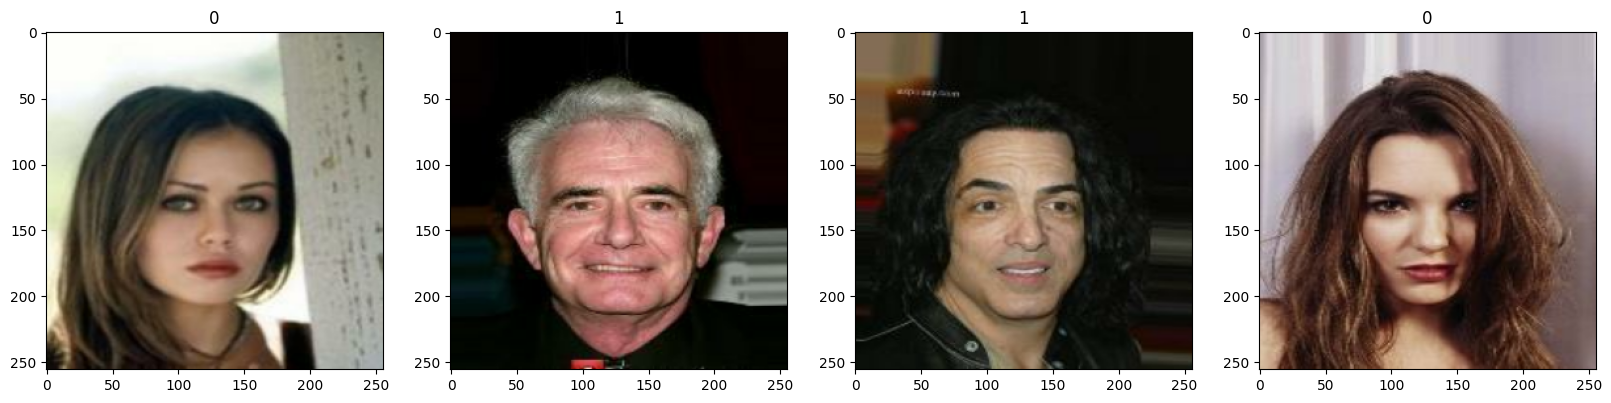

In [25]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

Since the data is coverted into array, howver, they are 250x250 in size, which gives the arrays of number also similar in range. This is expensive and power consuming, hence, we scale the data down by deviding them by 225.

In [26]:
data = unscaled_data.map(lambda x,y: (x/255, y))

As we can see, after scaling them, the arrays are now within the range of 0 to 1. This will help the model train much faster

In [27]:
data.as_numpy_iterator().next()

(array([[[[0.25882354, 0.19607843, 0.13333334],
          [0.24817708, 0.18543199, 0.12268689],
          [0.2345435 , 0.17179841, 0.10905331],
          ...,
          [0.08515625, 0.04799326, 0.01550245],
          [0.08235294, 0.04705882, 0.01176471],
          [0.08235294, 0.04705882, 0.01176471]],
 
         [[0.2527267 , 0.18998162, 0.12723652],
          [0.24373546, 0.18099037, 0.11824527],
          [0.23076873, 0.16802362, 0.10527852],
          ...,
          [0.09052669, 0.0533637 , 0.02087289],
          [0.08844975, 0.05315564, 0.01786152],
          [0.08844975, 0.05315564, 0.01786152]],
 
         [[0.24851409, 0.18576899, 0.1230239 ],
          [0.23865782, 0.17591271, 0.11316761],
          [0.22534257, 0.16259748, 0.09985238],
          ...,
          [0.09887618, 0.06171319, 0.02922238],
          [0.09759498, 0.06230086, 0.02700674],
          [0.09759498, 0.06230086, 0.02700674]],
 
         ...,
 
         [[0.45477942, 0.3449755 , 0.19203432],
          [0.51609

## Build the Model

Let's divde 2000 images in the dataset into 3 sets with the following ratio:
- 70% : train set
- 20% : validation set
- 10% : test set

We can set multiple set size but these ratio are highly recommended and widely used

In [28]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

## Train the model

We use the Sequential model to train the data since it is highly recommended for image classification. There are better models, however, they cost a lot of computer's power. And since the images in our dataset is well defined, high resolution, with clear visual, we do not need higher performance models

In [29]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

From here, we getting more technical with adding multiple layers such as convolution, pooling, flatten, and dense. This is where graph theory takes place. We will go in more detail later.

In [31]:
model = Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [32]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

Let's look at the comparision between loss and val_loss to see how well the model perform. As we can see the val_loss kind of goes off track with loss (decreases slower than loss in a small margin), this is a sligh indication of overfitting, which we will also discuss more on how to fix them later.

In [34]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [35]:
hist = model.fit(train, epochs = 5, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/5
84/84 [==============================] - 37s 428ms/step - loss: 0.6512 - accuracy: 0.6492 - val_loss: 0.4736 - val_accuracy: 0.7526
Epoch 2/5
84/84 [==============================] - 34s 404ms/step - loss: 0.3787 - accuracy: 0.8304 - val_loss: 0.2896 - val_accuracy: 0.8607
Epoch 3/5
84/84 [==============================] - 34s 402ms/step - loss: 0.2802 - accuracy: 0.8735 - val_loss: 0.3091 - val_accuracy: 0.8672
Epoch 4/5
84/84 [==============================] - 34s 408ms/step - loss: 0.2163 - accuracy: 0.9118 - val_loss: 0.2690 - val_accuracy: 0.8880
Epoch 5/5
84/84 [==============================] - 34s 403ms/step - loss: 0.1672 - accuracy: 0.9327 - val_loss: 0.2731 - val_accuracy: 0.8997


## Test the model

Let's import some random photos and have a look at the model's predictions

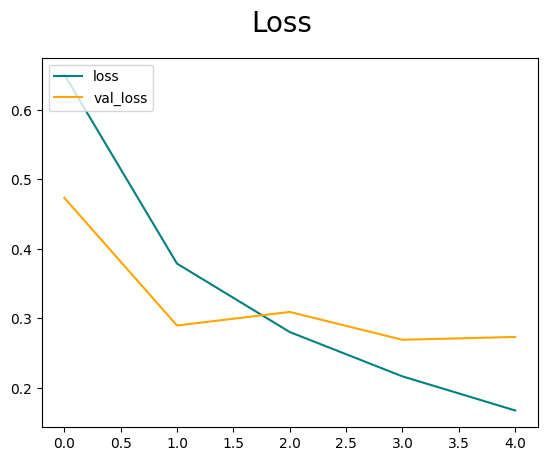

In [36]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

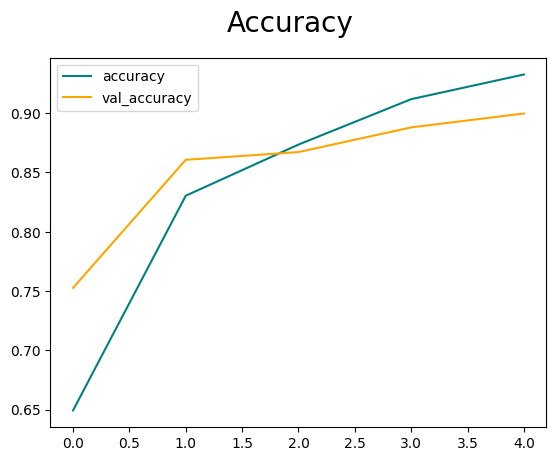

In [37]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [38]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [39]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [40]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)
print(pre.result(), re.result(), acc.result())

1/1 [==============================] - 0s 68ms/step
tf.Tensor(0.875, shape=(), dtype=float32) tf.Tensor(0.7826087, shape=(), dtype=float32) tf.Tensor(0.8515406, shape=(), dtype=float32)


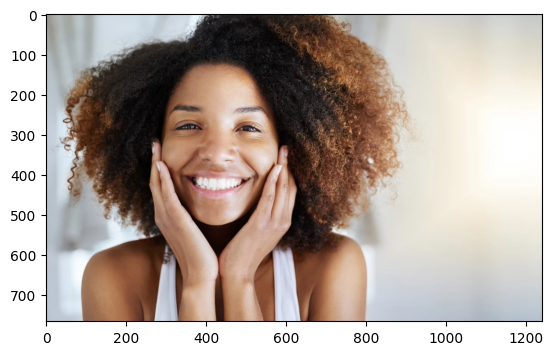

In [41]:
img = cv2.imread('smile.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
plt.show()

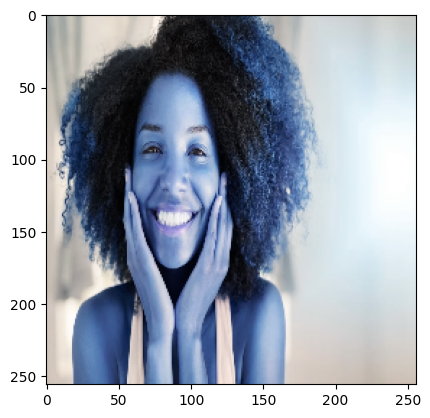

In [42]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

## The prediction gives the correct results

In [43]:
example1 = model.predict(np.expand_dims(resize/255, 0))
if example1 > 0.5: 
    print(f'Prediction is Smile')
else:
    print(f'Prediction is No Smile')

1/1 [==============================] - 0s 21ms/step
Prediction is Smile


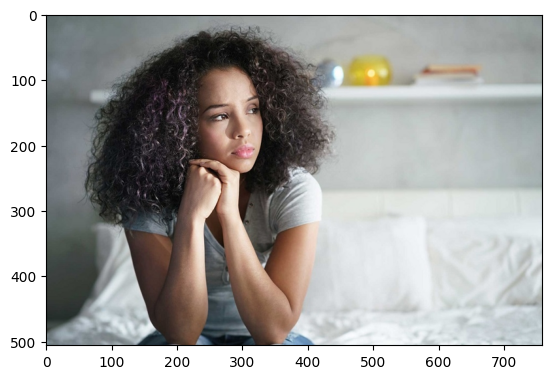

In [44]:
img = cv2.imread('sad.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
plt.show()

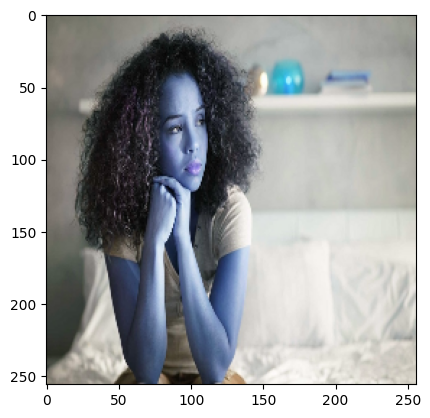

In [45]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [46]:
example1 = model.predict(np.expand_dims(resize/255, 0))
if example1 > 0.5: 
    print(f'Prediction is Smile')
else:
    print(f'Prediction is No Smile')

1/1 [==============================] - 0s 23ms/step
Prediction is No Smile
